In [ ]:
# A Random Forest Model doesn't seem very intuitive:
# How can several decision trees that are worse than a standard decision tree collectively 
# give predictions that are better than the single, standard decision tree?

# Maybe because it's less likely that that the majority of inferior decision trees will predict 
#    the wrong class than the single standard decision tree predicting the wrong class

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Load the breast cancer data into a dataframe
cancer_data = load_breast_cancer()
dataframe = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
dataframe['target'] = cancer_data['target']
# Split the breast cancer data into features and target
x = dataframe[cancer_data.feature_names].values
y = dataframe['target'].values
# Split the features and target into training sets and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101)

# Create and train the random forest model
randomForestModel = RandomForestClassifier()
randomForestModel.fit(x_train, y_train)

# Calculate the accuracy of the random forest model
y_pred = randomForestModel.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy of random forest model:', accuracy)
#print(precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred))

# See how the accuracy of our random forest model compares with the accuracy of a decision tree model
decisionTreeModel = DecisionTreeClassifier()
decisionTreeModel.fit(x_train, y_train)
y_pred = decisionTreeModel.predict(x_test)
decisionTreeAccuracy = accuracy_score(y_test, y_pred)
print('accuracy of decision tree model:', decisionTreeAccuracy)
#print(precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred))

accuracy of random forest model: 0.965034965034965
accuracy of decision tree model: 0.9090909090909091


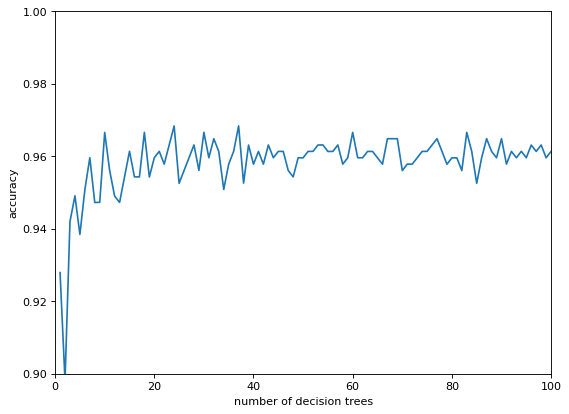

RandomForestClassifier(n_estimators=10)

In [ ]:
# Use grid search to construct an elbow curve find the optimal number of decision trees to use in our Random Forest Model
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

# Load the breast cancer data into a dataframe
cancer_data = load_breast_cancer()
dataframe = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
dataframe['target'] = cancer_data['target']
# Split the breast cancer data into features and target
x = dataframe[cancer_data.feature_names].values
y = dataframe['target'].values

# Do grid search stuff
parameterGrid = {'n_estimators': list(range(1, 101))}
RandomForestModel = RandomForestClassifier()
gridSearch = GridSearchCV(RandomForestModel, parameterGrid, cv=5) # The cv=5 means each of the 100 models
                                                                                 #    will be evaluated using k-fold cross validation
gridSearch.fit(x, y)
scores = gridSearch.cv_results_['mean_test_score']

# Use matplotlib to graph the results
plt.plot(list(range(1, 101)), scores)
plt.xlabel('number of decision trees')
plt.ylabel('accuracy')
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.show()

# As we can see, the graph starts to plateau at around 10 decision trees
# So the optimal number of decision trees to use in our Random Forest model is 10
randomForestModel = RandomForestClassifier(n_estimators=10)
randomForestModel.fit(x, y)

In [ ]:
# Every Random Forest model has a variable named feature_importance_, which shows the relative importance of each feature
# Find the feature importances of a Random Forest model that has 10 decision trees
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the breast cancer data into a dataframe
cancer_data = load_breast_cancer()
dataframe = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
dataframe['target'] = cancer_data['target']
# Split the breast cancer data into features and target
x = dataframe[cancer_data.feature_names].values
y = dataframe['target'].values
# Split the features and target into training sets and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101)

# Create and train the random forest model
randomForestModel = RandomForestClassifier(n_estimators=10, random_state=111)
randomForestModel.fit(x_train, y_train)

# See how important each feature is in the model
featureImportance = pd.Series(randomForestModel.feature_importances_, index=cancer_data['feature_names'])
featureImportance = featureImportance.sort_values(ascending=False)
print(featureImportance)

worst radius               0.309701
mean concave points        0.183126
worst concave points       0.115641
mean perimeter             0.064119
mean radius                0.058742
worst concavity            0.050951
radius error               0.049103
mean texture               0.017197
worst area                 0.016512
mean concavity             0.014696
area error                 0.012605
worst texture              0.011080
mean area                  0.009884
worst smoothness           0.009018
worst perimeter            0.008645
worst symmetry             0.008625
mean fractal dimension     0.008474
mean compactness           0.007005
mean smoothness            0.006066
mean symmetry              0.005523
worst fractal dimension    0.005290
concave points error       0.005236
texture error              0.004788
perimeter error            0.004489
smoothness error           0.004386
compactness error          0.004120
concavity error            0.001843
fractal dimension error    0

In [ ]:
# Build a new model with only the features that are important, and see if that improves the accuray
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the breast cancer data into a dataframe
cancer_data = load_breast_cancer()
dataframe = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
worstFeatures = [f for f in cancer_data['feature_names'] if 'worst' in f]      # get a list of the feature names that have the word 'worst'
dataframe = dataframe[worstFeatures]
dataframe['target'] = cancer_data['target']
# Split the breast cancer data into features and target
x = dataframe[worstFeatures].values
y = dataframe['target'].values
# Split the features and target into training sets and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101)

# Create and train the random forest model
randomForestModel = RandomForestClassifier(n_estimators=10, random_state=111)
randomForestModel.fit(x_train, y_train)
# Calculate the accuracy of the random forest model
y_pred = randomForestModel.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy of random forest model (with only selected features):', accuracy)

accuracy of random forest model (with only selected features): 0.972027972027972


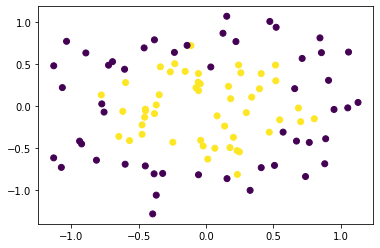

Random Forest Accuracy: 0.8099999999999999
Logistic Regression Accuracy: 0.36


In [49]:
# Create a dataset where the datapoints are arranged in circles
# Then use this dataset to create a Random Forest Model and a Logistic Regression Model
# Evaluate the two models and compare the accuracy of the two models predicting on this circular dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# x contains the features (there are 2 features), and y contains the target
x, y = make_circles(noise=0.2, factor=0.5, random_state=1)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

# Do k-fold stuff
logisticRegressionAccuracy, randomForestAccuracy = [], []
kf = KFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in kf.split(x):
    x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    
    logisticRegressionModel = LogisticRegression()
    logisticRegressionModel.fit(x_train, y_train)
    logisticRegressionAccuracy.append(logisticRegressionModel.score(x_test, y_test))

    randomForestModel = RandomForestClassifier(n_estimators=100)
    randomForestModel.fit(x_train, y_train)
    randomForestAccuracy.append(randomForestModel.score(x_test, y_test))


print('Random Forest Accuracy:', np.mean(randomForestAccuracy)) 
print('Logistic Regression Accuracy:', np.mean(logisticRegressionAccuracy))
